# Scope and project steps
- #### Scope

This project focuses on the comprehensive cleaning and analysis of the Stack Overflow 2023 survey dataset. The survey encompasses diverse information about developers worldwide, covering aspects such as coding experience, learning methodologies, net yearly income, and various other pertinent details. The goal is to present a reader-friendly and informative exploration of the dataset, shedding light on the trends and insights within the global developer community.

- #### Project steps
    1. Download the survey results as csv and the survey itself as pdf.
    2. Ask the Questions we want to answer using our data.
    3. Determine the useful columns for answering those questions.
    4. Clean your data and do some feature engineering.
    5. Answer the Questions using plots.
    
- #### Extra statystical analysis:
    1. View the distribution of the yearly income.
    2. Try to impute the missing values using various methods.
    3. Check resulted distribution after imputation


# Data scource 
- #### Download the dataset using this link: https://insights.stackoverflow.com/survey

# Table of contents
- #### [Imports and brief description of the dataset](#Imports)
- #### [*RemoteWork* column preperation](#RemoteWork)
- #### [*YearsCode* column preperation](#YearsCode)
- #### [*EdLevel* column preperation](#EdLevel)
- #### [*Employment* column preperation](#Employment)
- #### [*LearnCode* column preperation](#LearnCode)
- #### [*ConvertedCompYearly* column preperation](#ConvertedCompYearly)
- #### [*IncomeRecord* column creation and analysis of missing income data](#IncomeRecord)
- #### [Questions regarding the dataset and income of individuals](#AnalysisQs)
- #### [Analysis of the distribution for the *ConvertedCompYearly* column after imputation](#DistributionAnalysis)

<a id='Imports'></a>
# Imports and Data description

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None,'display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
data = pd.read_csv("C:\\Users\\gaber\\Downloads\\stack-overflow-developer-survey-2023\\survey_results_public.csv")

In [3]:
Imp_data = data[['Age','Employment','RemoteWork','EdLevel','LearnCode',\
           'YearsCode','DevType','OrgSize','Country','ConvertedCompYearly',\
            'LanguageHaveWorkedWith','DatabaseHaveWorkedWith','AISelect']].copy()

In [4]:
Imp_data.head()

,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCode,DevType,OrgSize,Country,ConvertedCompYearly,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,AISelect
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,18,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,285000.0,HTML/CSS;JavaScript;Python,Supabase,Yes
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,27,"Developer, back-end","5,000 to 9,999 employees",United States of America,250000.0,Bash/Shell (all shells);Go,NaN,"No, and I don't plan to"
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,12,"Developer, front-end",100 to 499 employees,United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,"No, and I don't plan to"
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,6,"Developer, full-stack",20 to 99 employees,Philippines,23456.0,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Yes


In [5]:
Imp_data.shape

(89184, 13)

In [6]:
Imp_data.isna().sum()

Age                           0
Employment                 1286
RemoteWork                15374
EdLevel                    1211
LearnCode                  1521
YearsCode                  1749
DevType                   12312
OrgSize                   24141
Country                    1211
ConvertedCompYearly       41165
LanguageHaveWorkedWith     2044
DatabaseHaveWorkedWith    15749
AISelect                   1211
dtype: int64

In [7]:
Imp_data.dtypes

Age                        object
Employment                 object
RemoteWork                 object
EdLevel                    object
LearnCode                  object
YearsCode                  object
DevType                    object
OrgSize                    object
Country                    object
ConvertedCompYearly       float64
LanguageHaveWorkedWith     object
DatabaseHaveWorkedWith     object
AISelect                   object
dtype: object

<a id= 'Income-outliers'></a>
# Data description

In [8]:
Imp_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,89184,8,25-34 years old,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,87898,106,"Employed, full-time",53748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RemoteWork,73810,3,"Hybrid (some remote, some in-person)",31131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EdLevel,87973,8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LearnCode,87663,790,"Other online resources (e.g., videos, blogs, f...",4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsCode,87435,52,10,6521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DevType,76872,33,"Developer, full-stack",25735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrgSize,65043,10,20 to 99 employees,13380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,87973,185,United States of America,18647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConvertedCompYearly,48019.0,NaN,NaN,NaN,103110.081718,681418.838712,1.0,43907.0,74963.0,121641.0,74351432.0


<a id='RemoteWork'></a>
# *RemoteWork* 
- Splitting by the parentheses
- Dropping the NaNs in the RemoteWork which correspond to NaNs in the ConvertedCompYearly

In [9]:
print(Imp_data.shape)
Imp_data['RemoteWork'] = Imp_data['RemoteWork'].apply(lambda x: str(x).split(' (')[0])
Imp_data['RemoteWork'].head()

(89184, 13)


0       nan
1    Remote
2    Hybrid
3    Hybrid
4    Remote
Name: RemoteWork, dtype: object

From the cell below we may see that all the individuals with RemoteWork value 'nan' also correspond to NaN values in the ConvertedCompYearly. So, We will drop them all.

In [10]:
Imp_data[(Imp_data['RemoteWork'] == 'nan')]['ConvertedCompYearly'].isna().sum()

15295

In [11]:
to_be_dropped = Imp_data[(Imp_data['RemoteWork'] == 'nan')].index
Imp_data.drop(index= to_be_dropped, axis=0 , inplace= True)
Imp_data.shape

(73810, 13)

<a id='YearsCode'></a>
# *YearsCode* 
- Swap the strings with integers
- change dtype to int
- Scatter plot ,Before cleaning, for the YearsCode vs ConvertedCompYearly

In [12]:
Imp_data['YearsCode'].unique()

array(['18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '35', '28', '40', '17', '7', nan, '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '23', '45',
       '31', '43', '48', '1', '41', '50', '42', '37', '39', '36', '44',
       '46', '49', '47'], dtype=object)

In [13]:
def years_coding_clean(value):
    if value == 'Less than 1 year':
        value = 1
    elif value == 'More than 50 years':
        value = 50
    return value

Imp_data['YearsCode'] = Imp_data['YearsCode'].map(years_coding_clean)
Imp_data['YearsCode'] = pd.to_numeric(Imp_data['YearsCode'])
Imp_data['YearsCode'].dtype

dtype('float64')

In [14]:
Imp_data['YearsCode'].unique()

array([18., 27., 12.,  6., 21.,  4.,  5., 20., 14., 10., 15., 11.,  3.,
       24.,  8., 13.,  1., 16., 33., 22., 30., 32., 35., 28., 40., 17.,
        7., nan, 29., 19., 50.,  9., 38., 26., 34., 25.,  2., 23., 45.,
       31., 43., 48., 41., 42., 37., 39., 36., 44., 46., 49., 47.])

##### We can use imputation via mean or most_frequent for *YearsCode* column as the NaN values are not that much (377 instance).

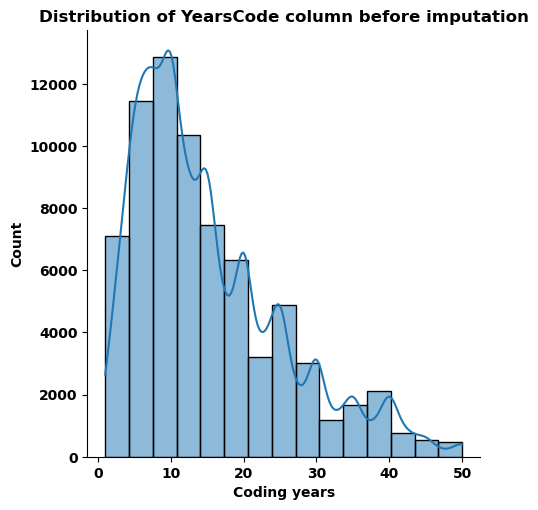

In [15]:
sns.displot(data= Imp_data, x= 'YearsCode', bins=15, kde=True);
plt.title('Distribution of YearsCode column before imputation')
plt.xlabel('Coding years')
plt.show();

In [16]:
print(Imp_data['YearsCode'].isna().sum())
Imp_data['YearsCode'] = Imp_data['YearsCode'].fillna(Imp_data['YearsCode'].mean())
print(Imp_data['YearsCode'].isna().sum())

378
0


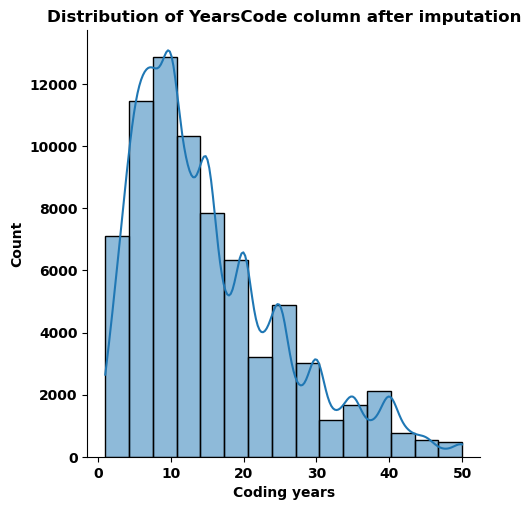

In [17]:
sns.displot(data= Imp_data, x= 'YearsCode', bins=15, kde=True);
plt.title('Distribution of YearsCode column after imputation')
plt.xlabel('Coding years')
plt.show();

<a id='year-coding-scatter-plot'></a>
#### From the scatter plot below we can see that there outliers in our data making the plot unclear.

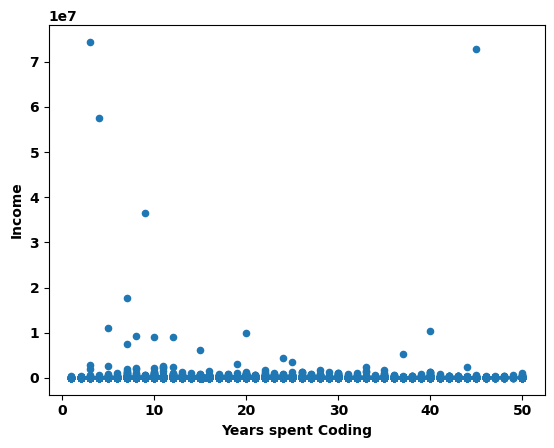

In [18]:
Imp_data.plot(x= 'YearsCode', y= 'ConvertedCompYearly', kind= 'scatter')
plt.xlabel('Years spent Coding')
plt.ylabel('Income')
plt.show();

<a id='EdLevel'></a>
# *EdLevel*
- analyze the inique values and the NaNs
- Drop the NaNs as they are 1211 individuals only in our population
- Split by the parantheses
- Shorten the value of 'Some college/university study without earning a degree' to 'College/University with no degree'

In [19]:
Imp_data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

Checking for the nan values in the EdLevel that correspond to NaN values in the ConvertedCompYearly.

In [20]:
Imp_data[Imp_data['EdLevel'] == 'nan']['ConvertedCompYearly'].isna().sum()

0

In [21]:
# mask = Imp_data['EdLevel'] == 'nan'
# Imp_data.drop(index= Imp_data[mask].index ,axis=0, inplace= True)

In [22]:
Imp_data['EdLevel'] = Imp_data['EdLevel'].apply(lambda x: str(x).split(' (')[0])

In [23]:
Imp_data['EdLevel'].head()

1                                    Bachelor’s degree
2                                    Bachelor’s degree
3                                    Bachelor’s degree
4                                    Bachelor’s degree
5    Some college/university study without earning ...
Name: EdLevel, dtype: object

In [24]:
Imp_data['EdLevel'] = Imp_data['EdLevel'].apply(lambda x: 'College/University with no degree' if str(x) == 'Some college/university study without earning a degree' else x)

<a id='EdLevel-CountPlot'></a>
## How the education level affects your pay?
Before removing outliers:
- Bar plot for the mean income of each education level

In [25]:
ed_group = Imp_data.groupby(by= 'EdLevel')['ConvertedCompYearly'].mean()

#### As we can see from the plot below that it does not make any sense that the primary/elementary school degrees would be able to secure a such large mean of income than the professional and master degrees.
This implies that the data has outliers and response fraud as those individuals inserted very high values in the ConvertedCompYearly which had a huge effect on the mean.

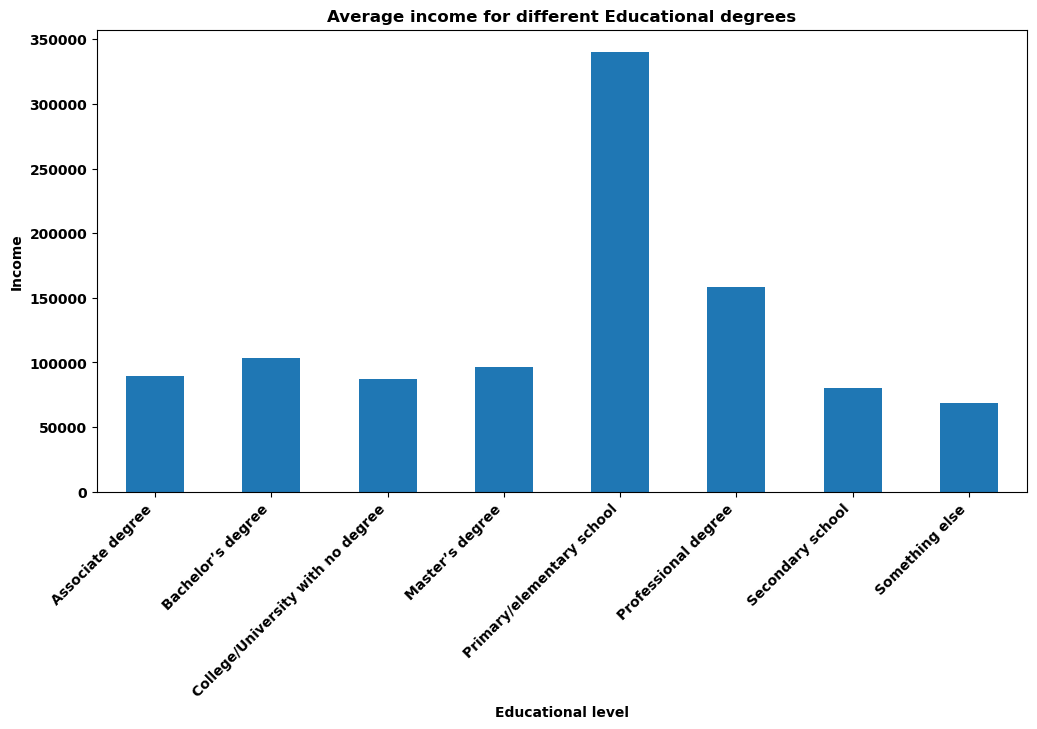

In [26]:
ax = plt.subplots(figsize=(12,6))[1]
ed_group.plot(x= 'EdLevel', y= 'ConvertedCompYearly', kind= 'bar', ax= ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Average income for different Educational degrees')
plt.xlabel('Educational level')
plt.ylabel('Income')
plt.show();

<a id='Employment'></a>
# *Employment* 
- adding the *Employed* column, which indicates whether the individual is employed or not (1 employed, 0 unemployed).
- Analyzing the Unemployed individuals.
- Removing all individuals with an employment state of unemployed 
- Dropping the Employed column we created

In [27]:
def employemnt_status(value):
    if 'Not employed' in str(value):
        value = 0
    else:
        value = 1
    return value

Imp_data['Employed'] = Imp_data['Employment'].map(employemnt_status)
Imp_data['Employed'].value_counts()

Employed
1    73035
0      775
Name: count, dtype: int64

#### As we can see ALL of the un-employed individuals have no income.

In [28]:
Imp_data[Imp_data['Employed'] == 0]['ConvertedCompYearly'].isna().sum()

775

#### Then we drop the individuals with employment as NaN and Income is NaN also

In [29]:
Imp_data.dropna(subset=['Employment', 'ConvertedCompYearly'], how='all', inplace=True)

In [30]:
Imp_data['Employment'].isna().sum()

0

<a id='LearnCode'></a>
# *LearnCode*
#### The *LearnCode* column needs to be split and one hot encoded for every unique value in the column.
Initially, NaN values are filled using the mode, which represents the most frequently occurring value in the column. This method is chosen due to the relatively low prevalence of NaN values in the dataset. Subsequently, the [`MultiLabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) from the scikit-learn library is employed to perform one-hot encoding on all unique values within the column. Lastly, the resulting DataFrame is concatenated back to the original dataset.

In [31]:
print(Imp_data['LearnCode'].isna().sum())
LearnCode_mode = str(Imp_data['LearnCode'].mode())
# print(type(LearnCode_mode))
Imp_data['LearnCode'] = Imp_data['LearnCode'].fillna(LearnCode_mode)
Imp_data['LearnCode'].isna().sum()

246


0

In [32]:
mlb = MultiLabelBinarizer()

split_labels = Imp_data['LearnCode'].apply(lambda x: [str(i) for i in x.split(';')])

encoded_data = mlb.fit_transform(split_labels)

encoded_df = pd.DataFrame(encoded_data, Imp_data.index, mlb.classes_)

encoded_df.head()

,"0 Other online resources (e.g., videos, blogs, f...\nName: LearnCode, dtype: object",Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Hackathons (virtual or in-person),On the job training,Online Courses or Certification,Other (please specify):,"Other online resources (e.g., videos, blogs, forum)","School (i.e., University, College, etc)"
1,0,1,0,1,1,1,1,1,0,1,1
2,0,1,0,1,0,0,1,0,0,1,1
3,0,0,0,1,1,0,0,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,1
5,0,1,0,1,0,0,0,1,0,1,0


In [33]:
rename_map = {
        'Hackathons (virtual or in-person)':'Hackathons',
       'Online Courses or Certification':'Online Courses / Certifications',
       'Other (please specify):':'Others',
       'Other online resources (e.g., videos, blogs, forum)':'Other online resources',
       'School (i.e., University, College, etc)':'School / College'}

encoded_df.drop(columns=['0    Other online resources (e.g., videos, blogs, f...\nName: LearnCode, dtype: object'], inplace=True)
encoded_df.rename(columns= rename_map, inplace= True)

encoded_df.columns

Index(['Books / Physical media', 'Coding Bootcamp', 'Colleague',
       'Friend or family member', 'Hackathons', 'On the job training',
       'Online Courses / Certifications', 'Others', 'Other online resources',
       'School / College'],
      dtype='object')

In [34]:
Imp_data = pd.concat([Imp_data, encoded_df], axis=1)

In [35]:
Imp_data.isna().sum()

Age                                    0
Employment                             0
RemoteWork                             0
EdLevel                                0
LearnCode                              0
YearsCode                              0
DevType                              300
OrgSize                             9138
Country                                0
ConvertedCompYearly                25870
LanguageHaveWorkedWith               511
DatabaseHaveWorkedWith             10298
AISelect                               0
Employed                               0
Books / Physical media                 0
Coding Bootcamp                        0
Colleague                              0
Friend or family member                0
Hackathons                             0
On the job training                    0
Online Courses / Certifications        0
Others                                 0
Other online resources                 0
School / College                       0
dtype: int64

<a id='ConvertedCompYearly'></a>
# *ConvertedCompYearly*
- Removing the outliers from it.
- Create an 'Income_record' column with values of 0 for NaNs in the *ConvertedCompYearly* column and 1 for other cases.

#### Below are boxplots indicating that there are outliers in the *ConvertedCompYearly* column

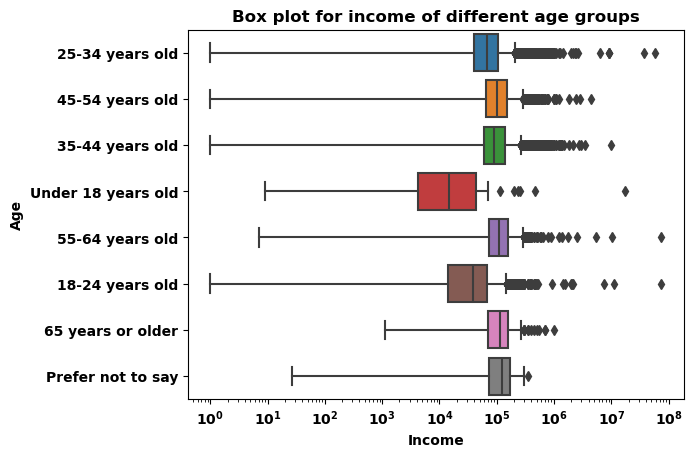

In [36]:
sns.boxplot(data= Imp_data, x= 'ConvertedCompYearly', y= 'Age');
plt.xscale('log')
plt.title('Box plot for income of different age groups')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show();

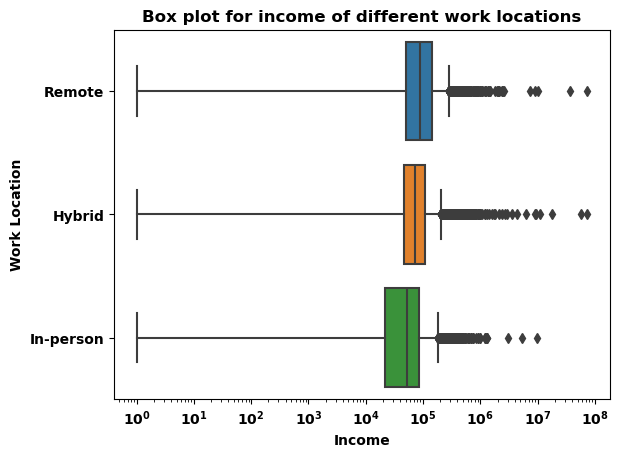

In [37]:
sns.boxplot(data= Imp_data, x= 'ConvertedCompYearly', y= 'RemoteWork');
plt.xscale('log')
plt.title('Box plot for income of different work locations')
plt.xlabel('Income')
plt.ylabel('Work Location')
plt.show();

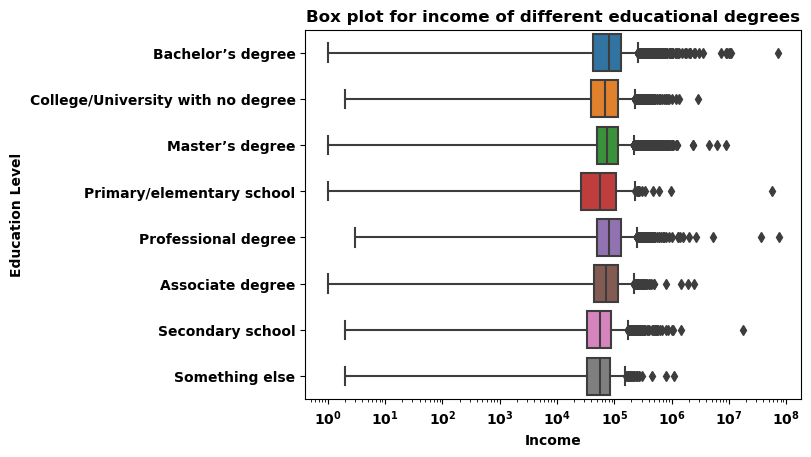

In [38]:
sns.boxplot(data= Imp_data, x= 'ConvertedCompYearly', y= 'EdLevel');
plt.xscale('log')
plt.title('Box plot for income of different educational degrees')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show();

#### Outlier removel using the IQR method 

In [39]:
Q1 = Imp_data['ConvertedCompYearly'].quantile(0.25)
Q3 = Imp_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
print(Imp_data.shape)
Imp_data = Imp_data[~((Imp_data['ConvertedCompYearly'] < (Q1-1.5*IQR)) | (Imp_data['ConvertedCompYearly'] > (Q3 + 1.5*IQR)))]
print(Imp_data.shape)

(73810, 24)
(71604, 24)


#### After removing the outliers lets compare the values of ConvertedCompYearly in the cell bellow and [In this cell](#Income-outliers)


In [40]:
Imp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsCode,71604.0,15.030534,10.215715,1.0,7.0,12.0,20.0,50.0
ConvertedCompYearly,45734.0,81316.696615,53017.115365,1.0,42836.0,72000.0,112377.0,237495.0
Employed,71604.0,0.989177,0.103472,0.0,1.0,1.0,1.0,1.0
Books / Physical media,71604.0,0.531241,0.499027,0.0,0.0,1.0,1.0,1.0
Coding Bootcamp,71604.0,0.094687,0.292785,0.0,0.0,0.0,0.0,1.0
Colleague,71604.0,0.257653,0.437345,0.0,0.0,0.0,1.0,1.0
Friend or family member,71604.0,0.106056,0.307911,0.0,0.0,0.0,0.0,1.0
Hackathons,71604.0,0.078613,0.269136,0.0,0.0,0.0,0.0,1.0
On the job training,71604.0,0.514441,0.499795,0.0,0.0,1.0,1.0,1.0
Online Courses / Certifications,71604.0,0.505028,0.499978,0.0,0.0,1.0,1.0,1.0


<a id='IncomeRecord'></a>
# *Income_record*
- We will create a new column called Income_record which will contain 1 if an individual has a *ConvertedCompYearly* and 0 if not.

In [41]:
Imp_data['Income_record'] = ~Imp_data['ConvertedCompYearly'].isna()*1
Imp_data['Income_record'].value_counts()

Income_record
1    45734
0    25870
Name: count, dtype: int64

<a id='AnalysisOfIncomeRecord'></a>
## Analysis of the *Income_record*
- ##### Checking what are the groups of Age that did not insert an income
- ##### Checking what are the groups of RemoteWOrk that did not insert an income
- ##### Checking what are the groups of EdLevel that did not insert an income
#### We will refer to the following analysis when we commence the imputation process for the *ConvertedCompYearly* column towards the conclusion of the notebook.

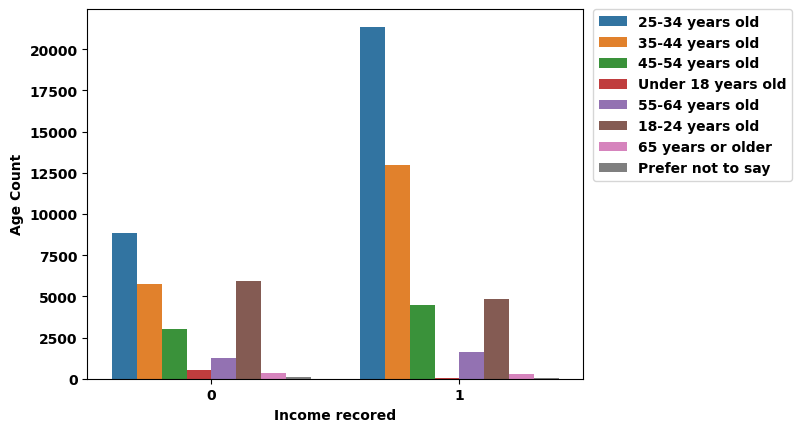

In [42]:
sns.countplot(x= 'Income_record', hue= 'Age', data= Imp_data);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Income recored')
plt.ylabel('Age Count')
plt.show();

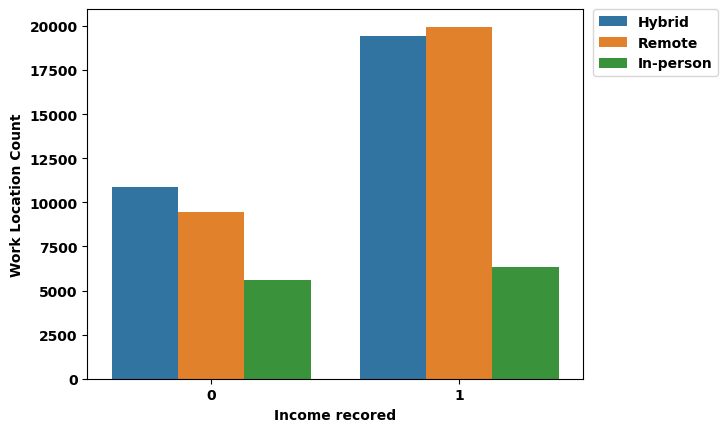

In [43]:
sns.countplot(x= 'Income_record', hue= 'RemoteWork', data= Imp_data);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Income recored')
plt.ylabel('Work Location Count')
plt.show();

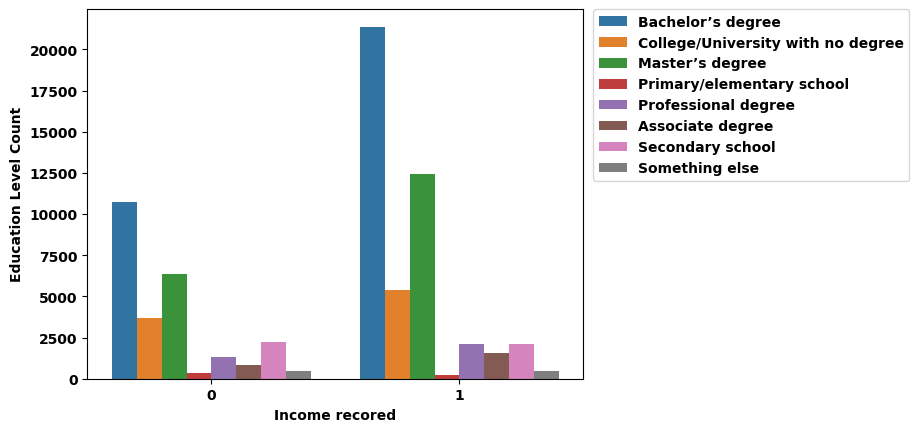

In [44]:
sns.countplot(x= 'Income_record', hue= 'EdLevel', data= Imp_data);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Income recored')
plt.ylabel('Education Level Count')
plt.show();

<a id='AnalysisQs'></a>
# Answering some questions affecting a person's income:

## How does RemoteWork affect your pay?
As we can see from the plot that the average pay rate for Remote employees is the highest

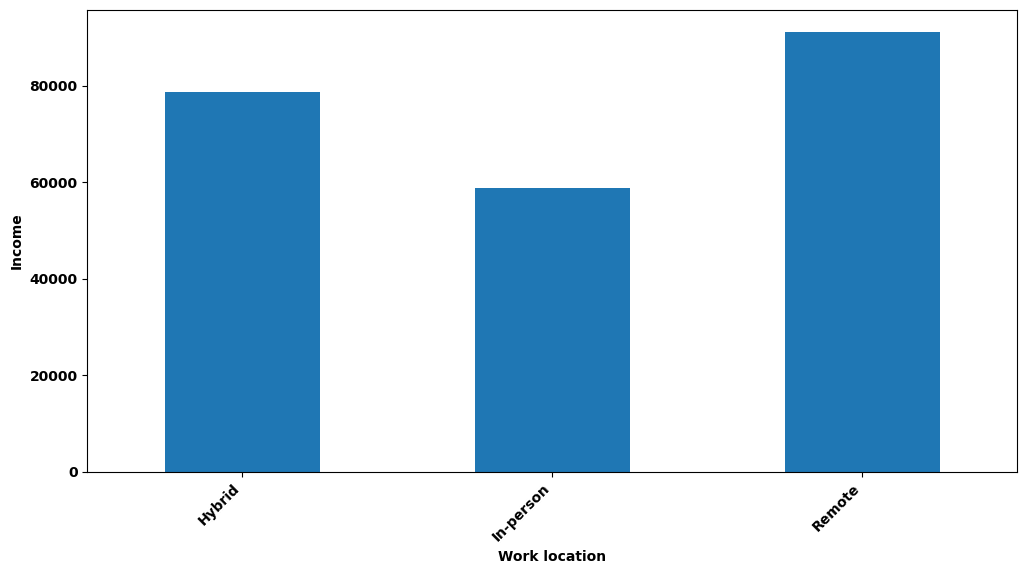

In [45]:
ax = plt.subplots(figsize=(12,6))[1]
Imp_data.groupby(by='RemoteWork')['ConvertedCompYearly'].mean().plot(kind='bar', ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Work location')
plt.ylabel('Income')
plt.show();

## Return to: How does the Education level affect your pay?
#### Lets compare the bellow plot with the one we created at the begining of the notebook for [How EdLevel affects your pay](#EdLevel-CountPlot)
See how the Primary/elementary school, secondar school, and something else education levels has the lowest of the mean of incomes which makes sense unlike the graph from the cell in the hyperlink.

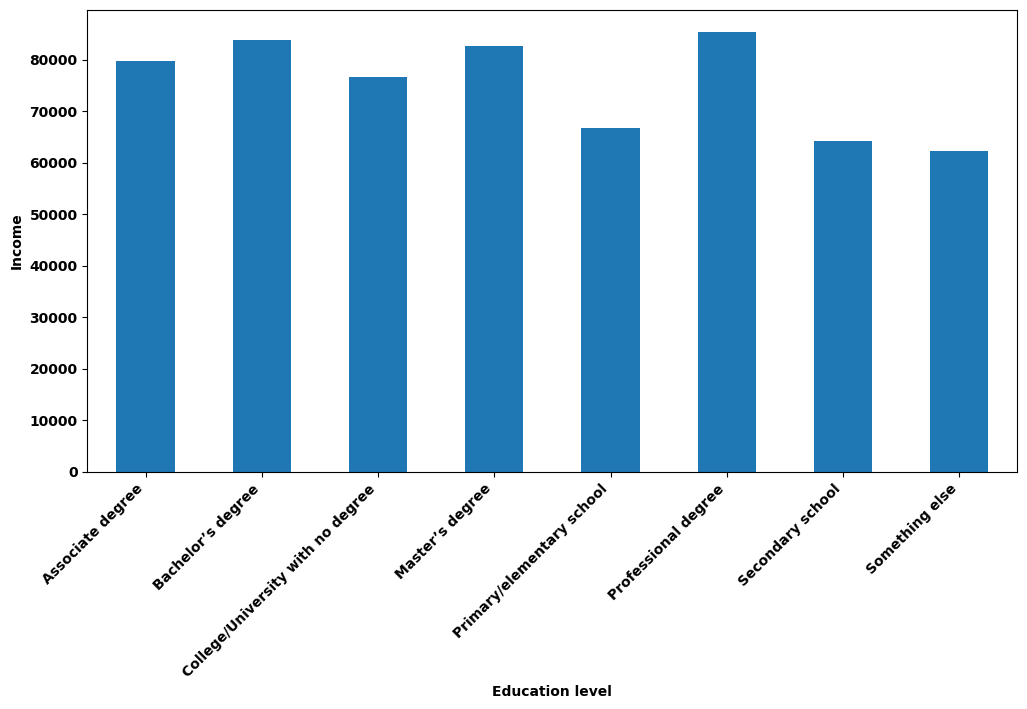

In [46]:
ax = plt.subplots(figsize=(12,6))[1]
Imp_data.groupby(by='EdLevel')['ConvertedCompYearly'].mean().plot(kind='bar', ax= ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Education level')
plt.ylabel('Income')
plt.show();

## Revisit: How does the coding years affect your pay?
[In the previous chart](#year-coding-scatter-plot) there was no obvious pattern as the outliers were very large to show the full scatter plot.   
Now we removed the outliers and it seems that a scatter plot is very crowded with points and is not helping in recognizing any underlying relation.

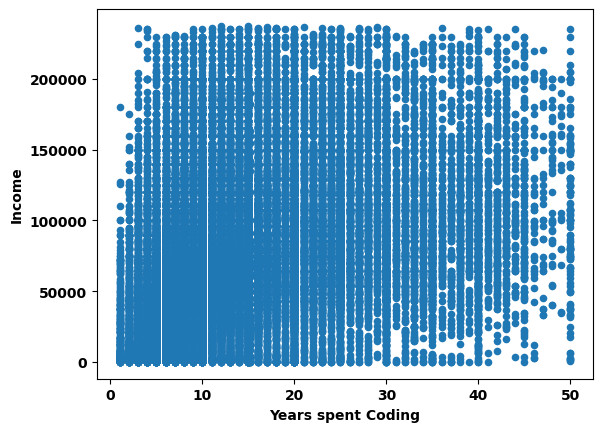

In [47]:
Imp_data.plot(x= 'YearsCode', y= 'ConvertedCompYearly', kind= 'scatter')
plt.xlabel('Years spent Coding')
plt.ylabel('Income')
plt.show();

#### Hexbin plot
- A noticeable concentration of lower income is observed in the bottom-left corner of the plot, indicating a prevalence among individuals with limited coding experience.
- This suggests a correlation where individuals with fewer years of coding experience are more likely to have lower income levels.

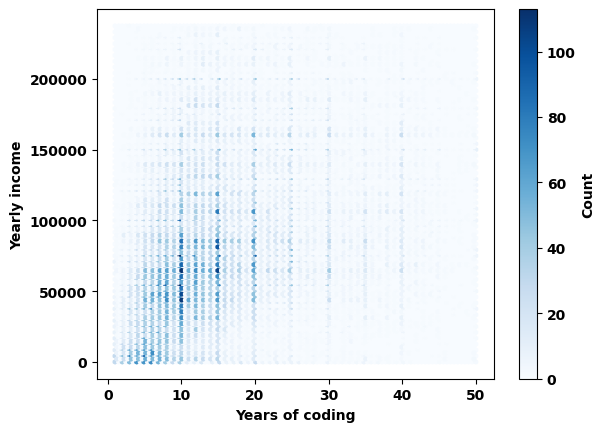

In [48]:
plt.hexbin(Imp_data['YearsCode'], Imp_data['ConvertedCompYearly'], cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Years of coding')
plt.ylabel('Yearly income')
plt.show()

## Top 5 countires in average income

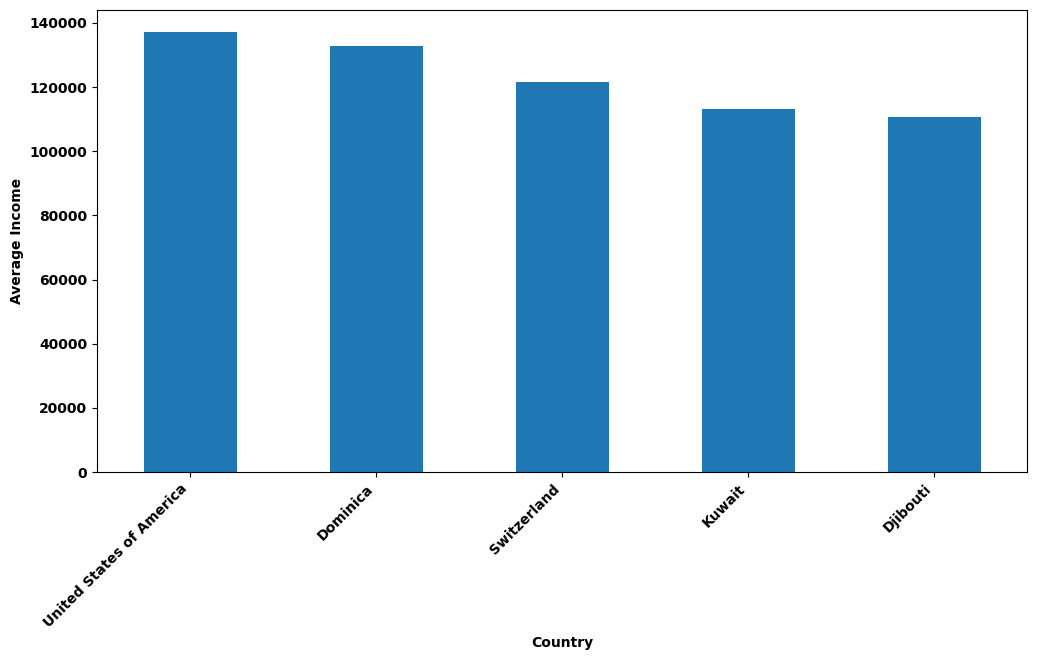

In [49]:
Top_10_countires= Imp_data.groupby(by='Country')['ConvertedCompYearly'].mean()
ax = plt.subplots(figsize=(12,6))[1]
Top_10_countires.sort_values(ascending=False).head(5).plot(kind='bar', ax= ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Average Income')
plt.show();

## What is the most popular method to learn coding?

In [50]:
columns=['Books / Physical media','Coding Bootcamp','Colleague','Friend or family member','Hackathons','On the job training',\
        'Online Courses / Certifications','Others','Other online resources','School / College']

learn_code_dict_counts = {}

for col in columns:
    learn_code_dict_counts[col] = Imp_data[col].sum()

print(learn_code_dict_counts )   

{'Books / Physical media': 38039, 'Coding Bootcamp': 6780, 'Colleague': 18449, 'Friend or family member': 7594, 'Hackathons': 5629, 'On the job training': 36836, 'Online Courses / Certifications': 36162, 'Others': 4130, 'Other online resources': 56894, 'School / College': 35505}


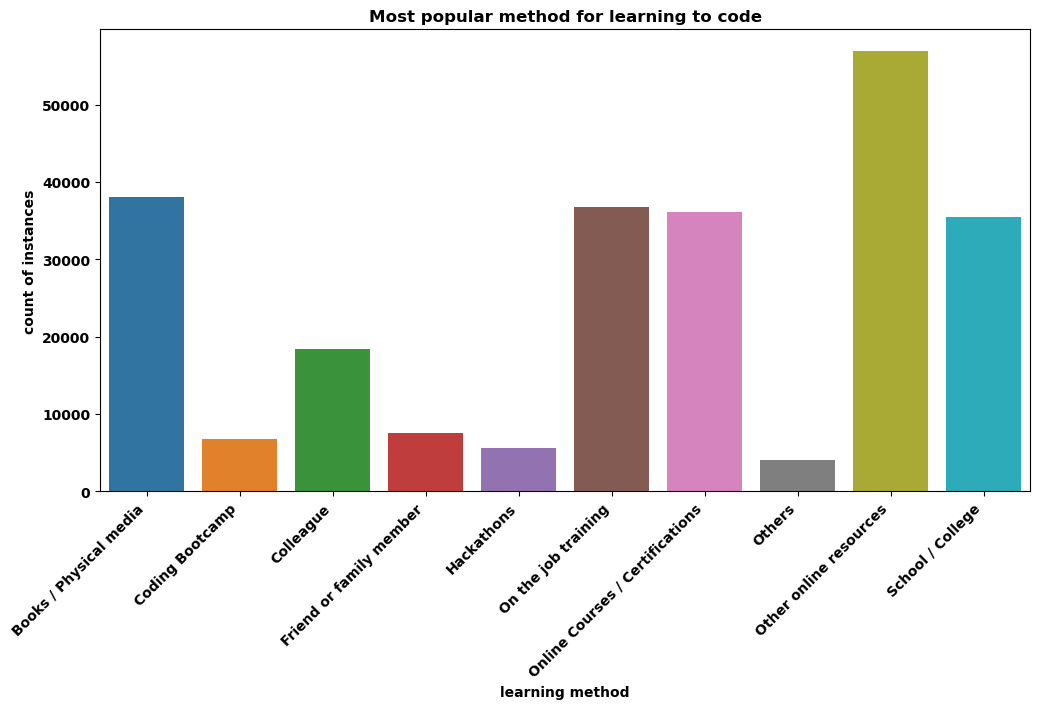

In [51]:
ax = plt.subplots(figsize=(12,6))[1]

categories = list(learn_code_dict_counts.keys())
values = list(learn_code_dict_counts.values())

sns.barplot(x=categories, y=values, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('learning method')
plt.ylabel('count of instances')
plt.title('Most popular method for learning to code')
plt.show();

## Employment rate for different degrees
- We used the *Employed* column created [here](#Employment) 

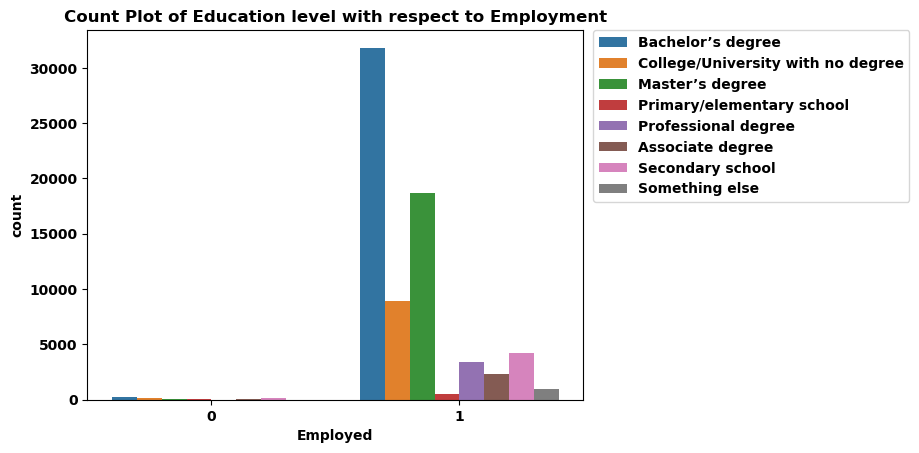

In [52]:
EdLevel_df = Imp_data.groupby(['EdLevel', 'Employed']).size().unstack()
sns.countplot(x='Employed', hue='EdLevel',data= Imp_data)
plt.title('Count Plot of Education level with respect to Employment')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

##### The below results suggest that:
- Highest employment rate for Master's degree (99.5%)
- Lowest employment rate for Primary/Elementary school degrees (94.3%)

In [53]:
EdLevel_df['Employed_rate'] = (EdLevel_df[1] / (EdLevel_df[0]+EdLevel_df[1])) * 100

In [54]:
EdLevel_df

Employed,0,1,Employed_rate
EdLevel,,,
Associate degree,38,2330,98.395270
Bachelor’s degree,284,31818,99.115320
College/University with no degree,173,8903,98.093874
Master’s degree,93,18691,99.504898
Primary/elementary school,32,535,94.356261
Professional degree,19,3422,99.447835
Secondary school,119,4200,97.244733
Something else,17,930,98.204857


<a id='DistributionAnalysis'></a>
# Data description after cleaning
- Checking the distribution of ConvertedCompYearly
- Checking the distribution of YearsCode
- Deciding the Imputation technique

In [55]:
Imp_data.head(5)

,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCode,DevType,OrgSize,Country,ConvertedCompYearly,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,AISelect,Employed,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Hackathons,On the job training,Online Courses / Certifications,Others,Other online resources,School / College,Income_record
3,25-34 years old,"Employed, full-time",Hybrid,Bachelor’s degree,Colleague;Friend or family member;Other online...,12.0,"Developer, front-end",100 to 499 employees,United States of America,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,"No, and I don't plan to",1,0,0,1,1,0,0,0,0,1,1,1
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Bachelor’s degree,Books / Physical media;Online Courses or Certi...,6.0,"Developer, full-stack",20 to 99 employees,Philippines,23456.0,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Yes,1,1,0,0,0,0,0,1,0,1,1,1
5,35-44 years old,"Employed, full-time",Remote,College/University with no degree,Books / Physical media;Colleague;Online Course...,21.0,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,BigQuery;Cloud Firestore;PostgreSQL;Redis,Yes,1,1,0,1,0,0,0,1,0,1,0,1
6,35-44 years old,"Employed, full-time",Remote,College/University with no degree,Friend or family member;Online Courses or Cert...,4.0,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Yes,1,0,1,0,1,0,0,1,0,0,0,1
7,25-34 years old,"Employed, full-time",Remote,Bachelor’s degree,Books / Physical media;Online Courses or Certi...,5.0,"Developer, full-stack",10 to 19 employees,United States of America,80000.0,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Dynamodb;MongoDB;MySQL;Redis;SQLite,Yes,1,1,1,0,0,0,1,1,0,1,1,1


In [56]:
Imp_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,71604,8,25-34 years old,30243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,71604,86,"Employed, full-time",51913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RemoteWork,71604,3,Hybrid,30282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EdLevel,71604,8,Bachelor’s degree,32102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LearnCode,71604,755,"Other online resources (e.g., videos, blogs, f...",3298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsCode,71604.0,NaN,NaN,NaN,15.030534,10.215715,1.0,7.0,12.0,20.0,50.0
DevType,71306,33,"Developer, full-stack",24441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OrgSize,62468,10,20 to 99 employees,13150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,71604,184,United States of America,14380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConvertedCompYearly,45734.0,NaN,NaN,NaN,81316.696615,53017.115365,1.0,42836.0,72000.0,112377.0,237495.0


<a id='income-distribuion'></a>
##### We will be implementing a straightforward imputation strategy, considering specific factors for the 'ConvertedCompYearly' column. The mean for imputation will be determined based on the variations observed in age and work location.

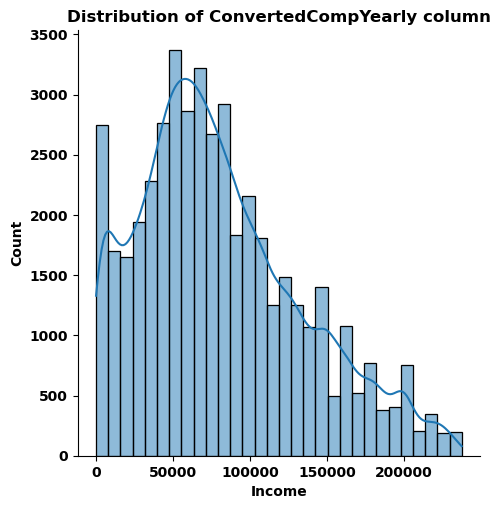

In [57]:
sns.displot(data= Imp_data, x= 'ConvertedCompYearly', bins=30, kde=True);
plt.title('Distribution of ConvertedCompYearly column')
plt.xlabel('Income')
plt.show();

###### We will perform the diptest to check for bimodality
From the results below we can deduce that our distribution for the ConvertetCompYearly is unimodal due to:  
- Dipstatistic value is zero
- P-value is one   
Thus, we can not reject the Unimodality. 

In [58]:
import diptest

dip, pval = diptest.diptest(Imp_data['ConvertedCompYearly'])
print("Dip Statistic:", dip)
print("P-value:", pval)

Dip Statistic: 0.0
P-value: 1.0


# Imputing missing values in the dataset
##### The following visualizations illustrate variations in annual income based on both work location and age.

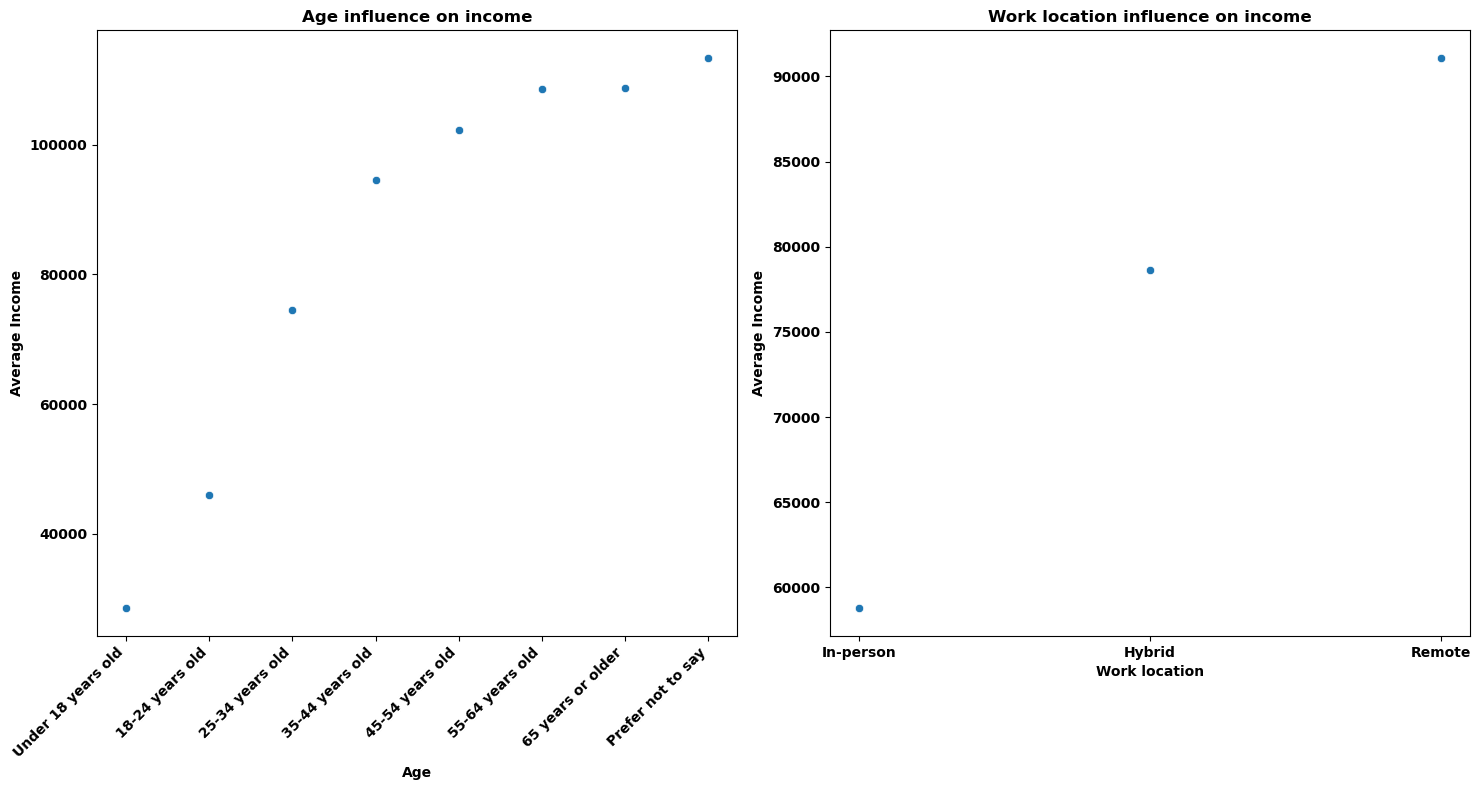

In [59]:
ax = plt.subplots(ncols=2, figsize=(15,8))[1]

sns.scatterplot(data= Imp_data.groupby(by='Age')['ConvertedCompYearly'].mean().sort_values(ascending= True), ax= ax[0]);
ax[0].set_title('Age influence on income')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Average Income')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.scatterplot(data= Imp_data.groupby(by='RemoteWork')['ConvertedCompYearly'].mean().sort_values(ascending= True), ax= ax[1]);
ax[1].set_title('Work location influence on income')
ax[1].set_xlabel('Work location')
ax[1].set_ylabel('Average Income')

plt.tight_layout()
plt.show();

### Below are the distributions of data after imputation using various methods:
- Average income according to Age, RemoteWork.
- Average income according to Age.
- Average income according to RemoteWork.
- Mean of the income column.   
We compare those imputations' distributions with [the original data distribution](#income-distribuion)

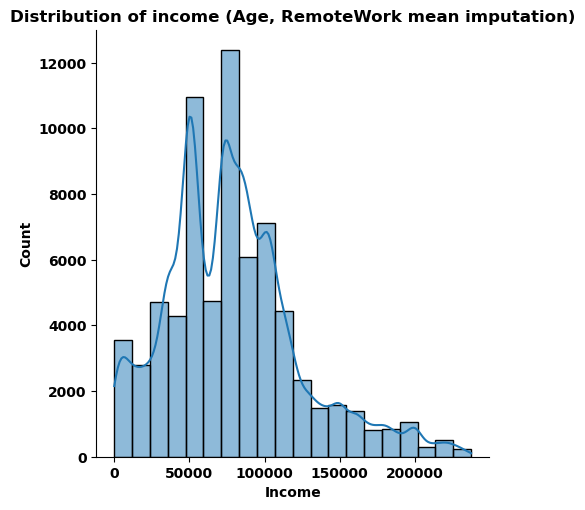

In [60]:
mean_of_groups = Imp_data.groupby(by=['Age','RemoteWork'])['ConvertedCompYearly'].transform('mean')

sns.displot(data= Imp_data['ConvertedCompYearly'].fillna(mean_of_groups), bins=20, kde=True);
plt.title('Distribution of income (Age, RemoteWork mean imputation)')
plt.xlabel('Income')
plt.show();

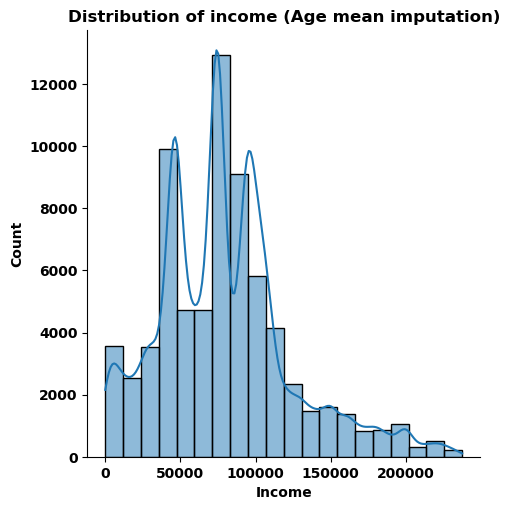

In [61]:
mean_of_groups = Imp_data.groupby(by=['Age'])['ConvertedCompYearly'].transform('mean')

sns.displot(data= Imp_data['ConvertedCompYearly'].fillna(mean_of_groups), bins=20, kde=True);
plt.title('Distribution of income (Age mean imputation)')
plt.xlabel('Income')
plt.show();

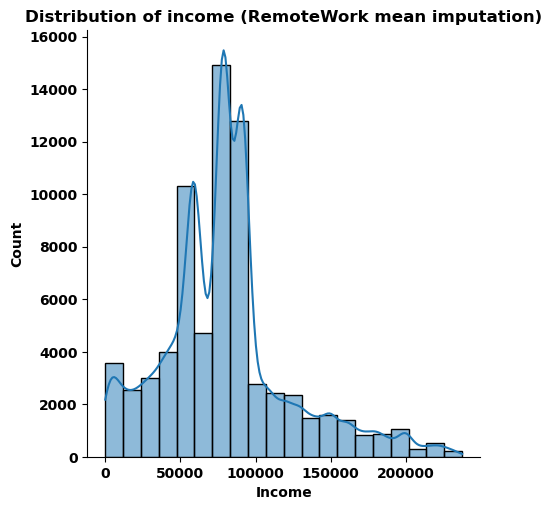

In [62]:
mean_of_groups = Imp_data.groupby(by=['RemoteWork'])['ConvertedCompYearly'].transform('mean')

sns.displot(data= Imp_data['ConvertedCompYearly'].fillna(mean_of_groups), bins=20, kde=True);
plt.title('Distribution of income (RemoteWork mean imputation)')
plt.xlabel('Income')
plt.show();

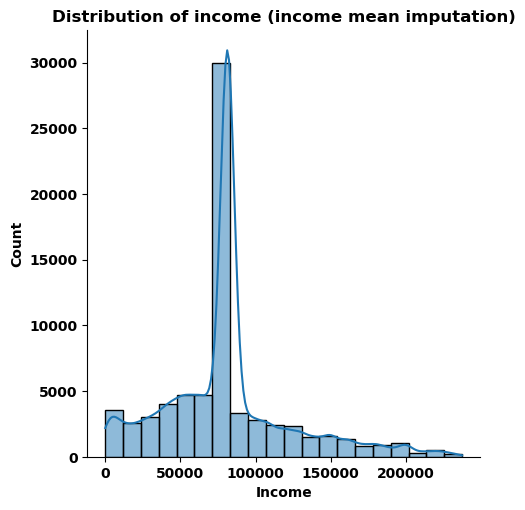

In [63]:
sns.displot(data= Imp_data['ConvertedCompYearly'].fillna(Imp_data['ConvertedCompYearly'].mean()), bins=20, kde=True);
plt.title('Distribution of income (income mean imputation)')
plt.xlabel('Income')
plt.show();

## Data Distribution after Imputation
Based on the visual analysis of the plots, the optimal approach for imputing the 'ConvertedCompYearly' column appears to be utilizing the means derived from the 'Age' and 'RemoteWork' factors, as it aligns closely with the [original data distribution](#income-distribuion).     

Notably, the distribution appears more bimodal than before, potentially indicating that the majority of missing values were concentrated around the two peaks. However, to validate this observation, further statistical tests are warranted.
##### So we will be conducting the Dip test as before

In [64]:
mean_of_groups = Imp_data.groupby(by=['Age','RemoteWork'])['ConvertedCompYearly'].transform('mean')


dip, pval = diptest.diptest(Imp_data['ConvertedCompYearly'].fillna(mean_of_groups))
print("Dip Statistic:", dip)
print("P-value:", pval)

Dip Statistic: 0.037771467097180704
P-value: 0.0


#### From the above results, our data distribution became more bimodal than it originally was.
##### This has many factors such as :
- Wrong imputation assumption.
- Imputation uncovered underlying patterns in our data.
- More Interactional effects were involved for our imputated column.   
Further work may be done for better imputing this column and more study and analysis should be done on the assumptions of our imputations.
##### Further work:
- carefully studying the relations between the variables.
- trying multivariate imputation. (Sklearn KNNimputer or IterativeImputer)
- Examining the distribution of the Imputed values itself.

## Hope this notebook was benificial.